In [66]:
import os
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# Introduction

### Figure 1.1: Undirected network with ajdacency matrix

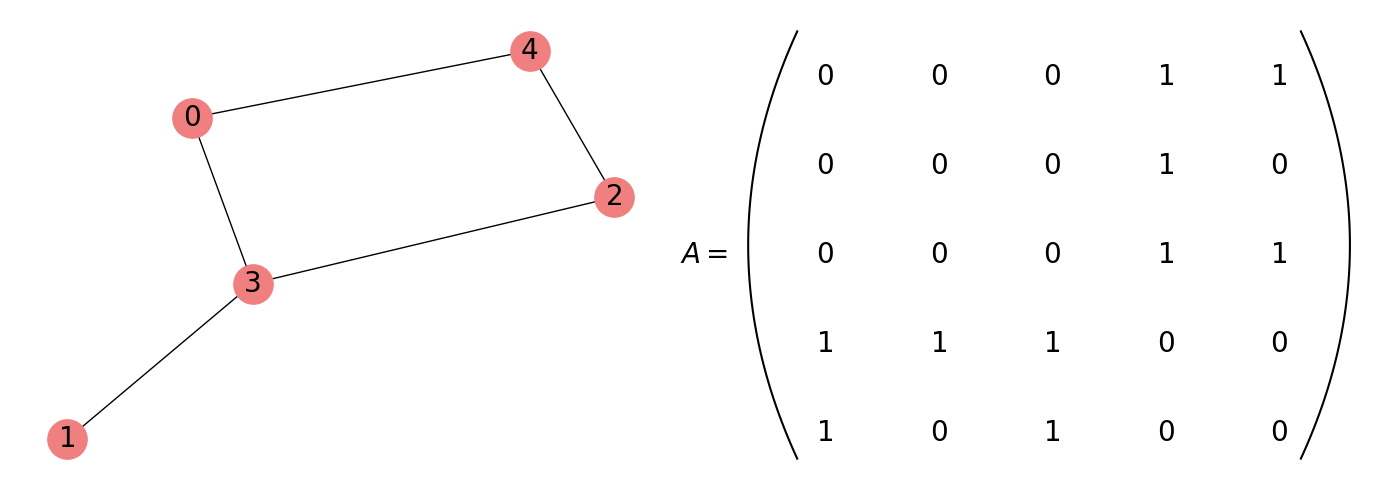

In [94]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define graph and its adjacency matrix
N = 5
graph = nx.erdos_renyi_graph(N, 0.5, seed = 0)
adjMatrix = nx.adjacency_matrix(graph).todense()

# Plot the graph
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (14, 5))
nx.draw_networkx(graph, ax = axes[0], node_color = "lightcoral", node_size = 800, font_size = 20)
axes[0].axis("off")

# Plot the matrix
for i in range(N):
    for j in range(N):
        axes[1].text(i * 0.5, (N - j - 1) * 0.5, f"${str(adjMatrix[i,j])}$", fontsize = 20)
axes[1].text(-0.6, 1, "$A = $", fontsize = 20)

# Add brackets
x = np.linspace(-1.2, 1.2, 100)
y = 0.15 * np.power(x, 2)
axes[1].plot(y-0.3, x+1.1, "k")
axes[1].plot(-y + 2.35, x+1.1, "k")
# axes[1].set_xlim(-2,N * 0.5)
# axes[1].set_ylim(0,N * 0.5)
axes[1].axis("off")
plt.subplots_adjust(wspace=0)
plt.tight_layout()
fig.savefig("Figures/1_adjMatrixExample.png")
plt.show()

### Figure 1.2: Degree distribution of an ER network + Poisson

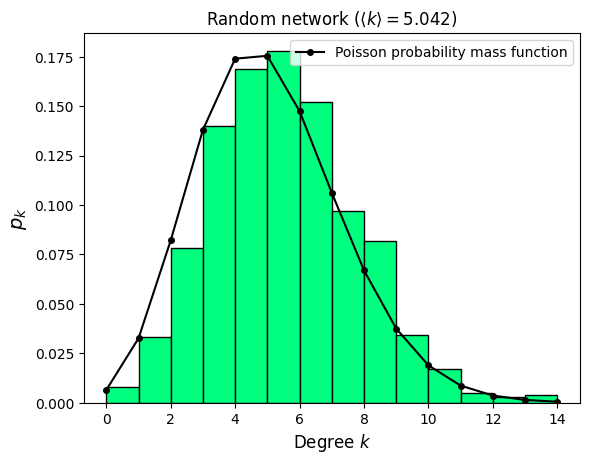

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import networkx as nx

# Generate the random network
N = 1000
p = 0.005
graph = nx.erdos_renyi_graph(N, p, seed = 0)
# graph = nx.barabasi_albert_graph(N, 3)
adjMatrix = nx.adjacency_matrix(graph).todense()

# Obtain the degree of each node
degrees = np.sum(adjMatrix, axis = 0)

# Define the mean of the Poisson distribution
av_k = np.mean(degrees)

# Generate x values (possible node degrees)
x = np.arange(0, len(np.unique(degrees)))

# Generate the corresponding y values (probabilities)
y = poisson.pmf(x, av_k)

# Plot the Poisson distribution with the corresponding average degree as parameter
plt.plot(x, y, '-o', color = "black", ms=4, label='Poisson probability mass function')
# Plot a histogram with the relative frequency of each degree
plt.hist(degrees, bins = len(np.unique(degrees))-1, weights=np.ones_like(degrees) / N, color = "springgreen", edgecolor = "black")
plt.xlabel('Degree $k$', fontsize = 12)
plt.ylabel('$p_k$', fontsize = 14)
plt.title(f'Random network ($\\langle k \\rangle = {av_k} $)')
#plt.xticks(x)
plt.legend()
plt.savefig("Figures/2_ER_poisson.png", dpi = 400)
plt.show()

### Figure 1.3: random network and scale-free network

C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


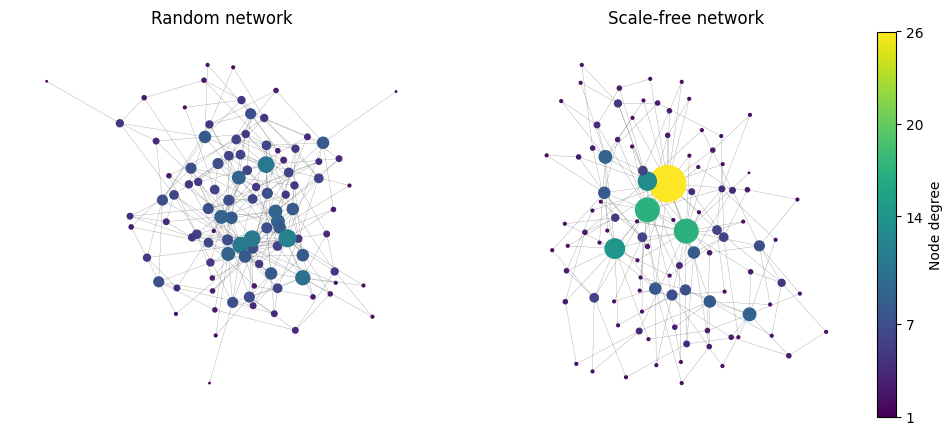

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Generate the scale-free network
N = 100
graph = nx.barabasi_albert_graph(N, 2, seed = 0)
graph2 = nx.erdos_renyi_graph(N, 0.05, seed = 1)
pos2 = nx.spring_layout(graph2)

# Compute the degree of each node
degree_dict = dict(graph.degree())
degrees = list(degree_dict.values())

degree_dict2 = dict(graph2.degree())
degrees2 = list(degree_dict2.values())

# Define a color map and size scaling for the nodes
color_map = plt.cm.viridis 
min_degree = min(degrees)
max_degree = max(degrees)

# Normalize degrees for the color map
norm = plt.Normalize(vmin=min_degree, vmax=max_degree)

# Generate colors and sizes based on degrees
node_colors = [color_map(norm(degree)) for degree in degrees]
node_sizes = [degree ** 2 for degree in degrees]  # Adjust the multiplier as needed

node_colors2 = [color_map(norm(degree)) for degree in degrees2]
node_sizes2 = [degree ** 2 for degree in degrees2] 

# Draw the graph
# plt.figure(figsize=(10, 8))
fig, axes = plt.subplots(1,2,figsize = (12, 5))
axes[0].axis("off")
axes[1].axis("off")
nx.draw_networkx(
    graph2, 
    pos = pos2,
    with_labels=False, 
    node_color=node_colors2, 
    node_size=node_sizes2, 
    cmap=color_map, 
    edge_color='gray',
    width = 0.2,
    ax = axes[0]
)
nx.draw_networkx(
    graph, 
    with_labels=False, 
    node_color=node_colors, 
    node_size=node_sizes, 
    cmap=color_map, 
    edge_color='gray',
    width = 0.2,
    ax = axes[1]
)

axes[0].set_title("Random network")
axes[1].set_title("Scale-free network")

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), label='Node degree', ax=axes[1])
cbar.set_ticks(np.round(np.linspace(min_degree, max_degree, 5)))
plt.savefig("Figures/3_random_vs_scalefree.png", dpi = 400)
plt.show()

### Figure 1.4: Comparison of the degree distribution of a scale-free network (purple) with a Poisson distribution (green).

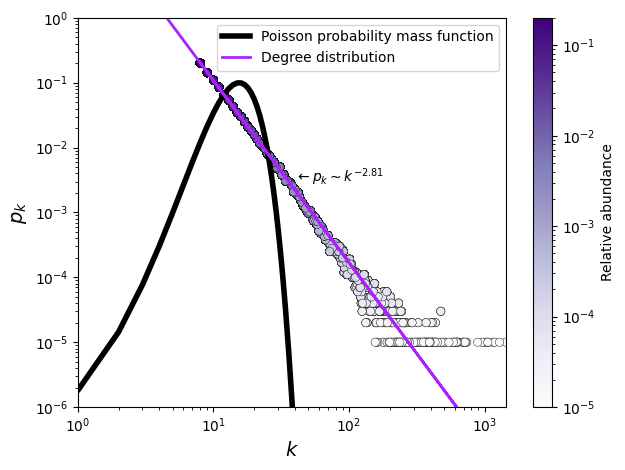

In [1]:
import statsmodels.api as sm
import matplotlib
import networkx as nx
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

N, m = 100000, 8
graph = nx.barabasi_albert_graph(N, m)

# Compute the degree of each node
degree_dict = dict(graph.degree())
degrees = np.array(list(degree_dict.values()))

# Obtain the degree distribution
degree_distribution_list = []
sorted_unique_degrees = np.sort(np.unique(degrees))
for k in sorted_unique_degrees:
    count = 0
    for node_k in degrees:
        if node_k != k:
            continue
        count += 1
    degree_distribution_list.append(count/N)
degree_distribution = np.array(degree_distribution_list)

degree_map = {}
for k, p_k in zip(sorted_unique_degrees, degree_distribution):
    degree_map[k] = p_k

mapped_degree_distribution = np.empty(N)

for node_i, node_k in enumerate(degrees):
    mapped_degree_distribution[node_i] = degree_map[node_k]

# Define the mean of the Poisson distribution
av_k = np.mean(degrees)

# Generate x values (possible node degrees)
x = np.arange(0, np.max(degrees))

# Generate the corresponding y values (probabilities)
y_poisson = poisson.pmf(x, av_k)

# Plot the Poisson distribution with the corresponding average degree as parameter
plt.plot(x, y_poisson, '-', color = "black", 
         ms=10, 
         linewidth = 4,
         label='Poisson probability mass function')




#Plot the line that fits the degree distribution
X = sm.add_constant(np.log(degrees))
y = np.log(mapped_degree_distribution)
# X_new = sm.add_constant(np.concatenate([np.array([1]),np.log(degrees)]))
lm = sm.OLS(y, X).fit()
plt.plot(np.concatenate([np.array([1]),degrees]), np.exp(np.concatenate([lm.predict(np.array([1,0])), lm.predict(X)])),
         color = "xkcd:electric purple",
         linewidth = 2,
         label = "Degree distribution")

# Plot the degree distribution of the scale-free network
cmap = plt.cm.Purples
norm = plt.Normalize(vmin = np.log(np.min(mapped_degree_distribution))-0.1, vmax = np.log(np.max(mapped_degree_distribution)))
# plt.plot(degrees, 
#          mapped_degree_distribution, "o",
#          color = "xkcd:vibrant purple",
#          alpha = 0.1)
plt.scatter(degrees, 
         mapped_degree_distribution,
         edgecolors="black",
         linewidth=0.3,
         c = cmap(norm(np.log(mapped_degree_distribution))))

exponent = "{" + str(round(lm.params[1], 2)) + "}"
plt.text(4e1, 0.3e-2, f"$\\leftarrow p_k \sim k^{exponent}$")

plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.ylim(1e-6,1)
plt.xlim(1,np.max(sorted_unique_degrees))
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("$p_k$", fontsize = 14)
plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.LogNorm(vmin = np.min(mapped_degree_distribution), 
                                                                  vmax = np.max(mapped_degree_distribution)), 
                                                                  cmap=cmap), 
             label='Relative abundance', 
             ax = plt.gca())
plt.tight_layout()
plt.savefig("Figures/sf_vs_poisson_distributions.png", dpi = 400)
plt.show()

### Figure 1.5: HR neuron variables

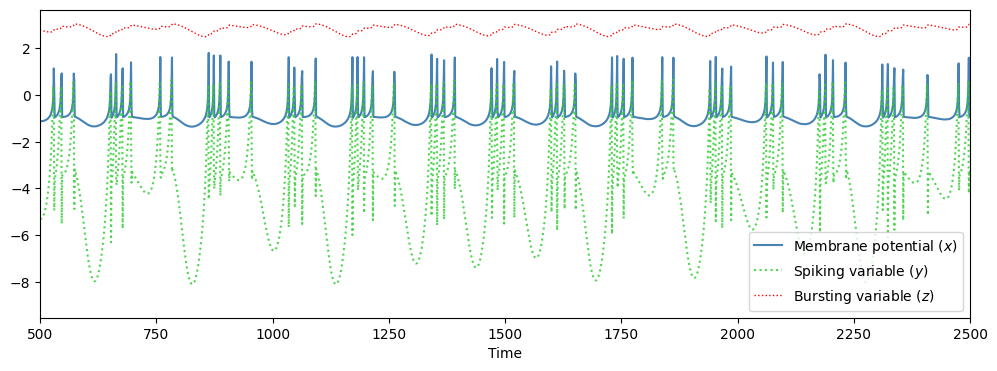

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint

def simple_HR_model(t, initial_state, I_bias = 2.9, a = 1.0, b = 3.0, c = 1.0, d = 5.0, s = 4.0, r = 0.006, x_r = -1.56):
    x = initial_state[0] # all the x values
    y = initial_state[1] # all the y values
    z = initial_state[2] # all the z values
    
    dX = np.empty(3)
    
    x2 = np.power(x,2)
    dX[0] = y - a * np.power(x, 3) + b * x2 - z + I_bias#dx/dt
    dX[1] = c - d * x2 - y #dy/dt
    dX[2] = r * (s * (x - x_r) - z) #dz/dt
    
    return dX

t_final = 2500
ppt = 1
tiempo = np.linspace(0, t_final, int(t_final * ppt)) #ppt valores por segundo
t_span = (0, t_final)
condicionInicial = np.random.rand(3)
I_bias = 2.9
integrator = scint.solve_ivp(simple_HR_model, t_span, condicionInicial, args = (I_bias,), dense_output=True)
solutions = integrator.sol(tiempo)
x, y, z = solutions

plt.figure(figsize = (12, 4))
plt.plot(tiempo, x, label = "Membrane potential ($x$)", color = "steelblue")
plt.plot(tiempo, y, label = "Spiking variable ($y$)", linestyle = "dotted", alpha = 0.85, color = "limegreen")
plt.plot(tiempo, z, label = "Bursting variable ($z$)", linestyle = "dotted", color = "red", linewidth = 1)
plt.xlabel("Time")
plt.xlim(500,t_final)
plt.legend(loc = 4)
plt.savefig("Figures/4_HR_xyz.png", dpi = 400)
plt.show()

### Figure 1.6: HR evolution with different $I_{ext}$

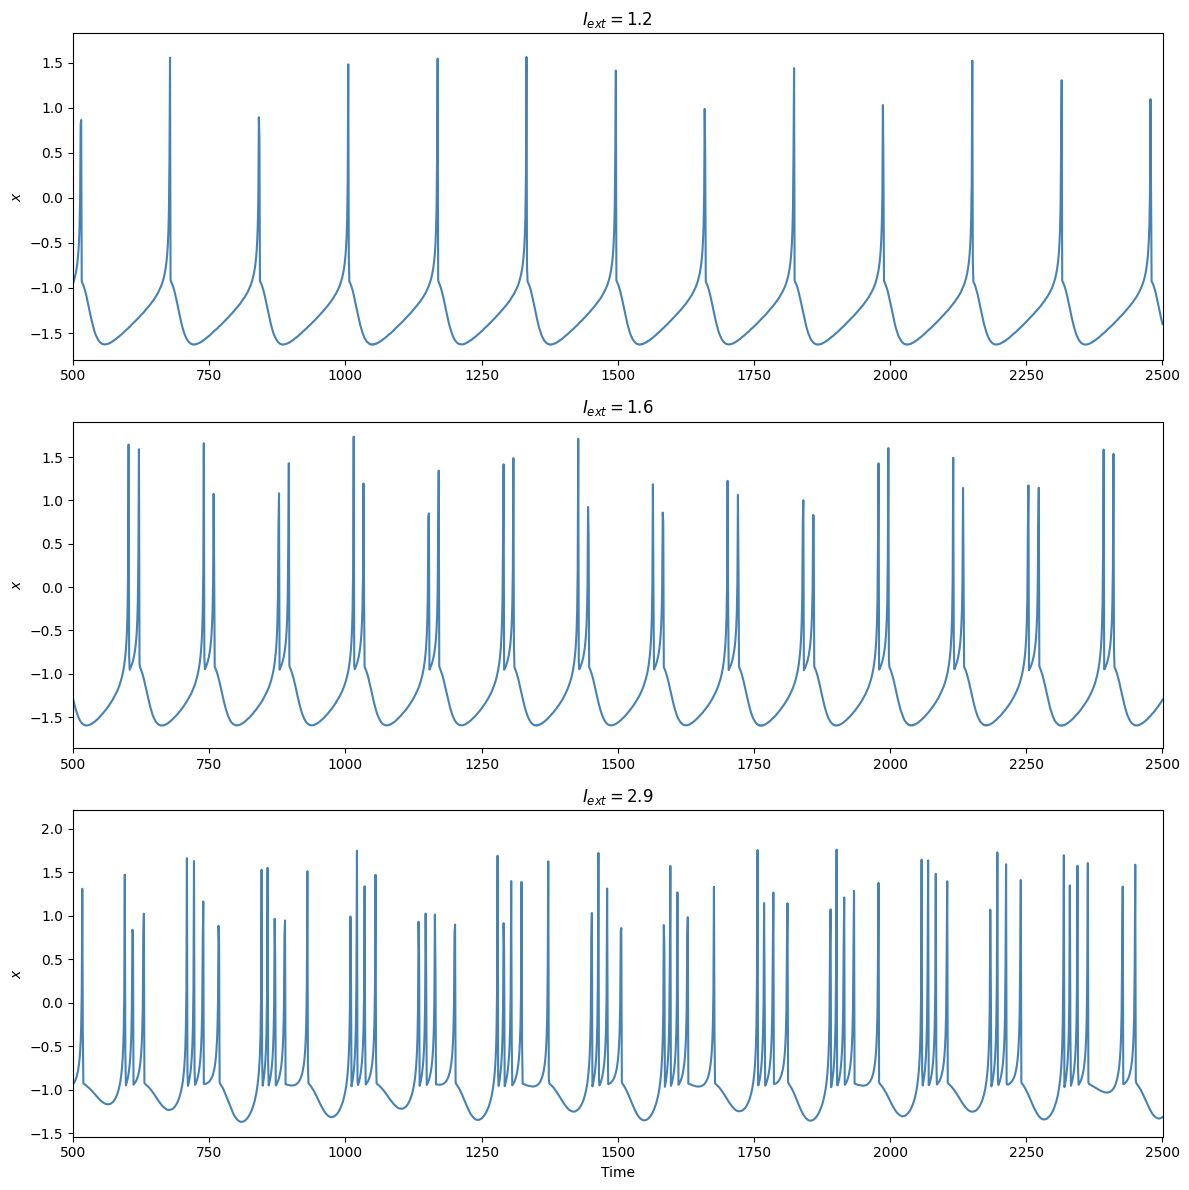

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint

def simple_HR_model(t, initial_state, I_bias = 2.9, a = 1.0, b = 3.0, c = 1.0, d = 5.0, s = 4.0, r = 0.006, x_r = -1.56):
    x = initial_state[0] # all the x values
    y = initial_state[1] # all the y values
    z = initial_state[2] # all the z values
    
    dX = np.empty(3)
    
    x2 = np.power(x,2)
    dX[0] = y - a * np.power(x, 3) + b * x2 - z + I_bias#dx/dt
    dX[1] = c - d * x2 - y #dy/dt
    dX[2] = r * (s * (x - x_r) - z) #dz/dt
    
    return dX

t_final = 2500
ppt = 1
tiempo = np.linspace(0, t_final, int(t_final * ppt)) #ppt valores por segundo
t_span = (0, t_final)
condicionInicial = np.random.rand(3)

fig, axes = plt.subplots(3,1,figsize = (12, 12))
I_bias_list = [1.2, 1.6, 2.9]
for ax, I_bias in zip(axes, I_bias_list):
    integrator = scint.solve_ivp(simple_HR_model, t_span, condicionInicial, args = (I_bias,), dense_output=True)
    solutions = integrator.sol(tiempo)
    x, y, z = solutions
    ax.plot(tiempo, x, label = "x", color = "steelblue")
    if I_bias == I_bias_list[-1]: ax.set_xlabel("Time")
    ax.set_title("$I_{ext} = $" + f"{I_bias}")
    ax.set_ylabel("$x$")
    ax.set_xlim(500, t_final)
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.savefig("Figures/5_HR_many_I.png", dpi = 400)
plt.show()

### Figure 1.7: The bifurcation diagram for a Hindmarsh-Rose neuron: interspike interval ($\Delta t$) versus external current ($I_{ext}$).

In [4]:
import pandas as pd
import numpy as np
import scipy.integrate as scint

def simple_HR_model(t, initial_state, I_bias = 2.9, a = 1.0, b = 3.0, c = 1.0, d = 5.0, s = 4.0, r = 0.006, x_r = -1.56):
    x = initial_state[0] # all the x values
    y = initial_state[1] # all the y values
    z = initial_state[2] # all the z values
    
    dX = np.empty(3)
    
    x2 = np.power(x,2)
    dX[0] = y - a * np.power(x, 3) + b * x2 - z + I_bias#dx/dt
    dX[1] = c - d * x2 - y #dy/dt
    dX[2] = r * (s * (x - x_r) - z) #dz/dt
    
    return dX
def simple_extreme_finder(x, type = "min"):
    peak_times = np.array(x)
    timestamps = len(x)
    for t in range(timestamps):
        match type:
            case "min":
                try:
                    # Not a minimum
                    if x[t] > x[t-1] or x[t] > x[t+1]:
                        peak_times[t] = 0
                except:
                    # First and last points are not minima
                    peak_times[t] = 0
            case "max":
                try:
                    # Not a maximum
                    if x[t] < x[t-1] or x[t] < x[t+1]:
                        peak_times[t] = 0
                except:
                    # First and last points are not maxima
                    peak_times[t] = 0
            case default:
                raise Exception("Enter a valid type (\'max\' or \'min\')")
    return np.where(peak_times != 0, 1, 0)

t_final = 2500
ppt = 1
tiempo = np.linspace(0, t_final, int(t_final * ppt)) #ppt valores por segundo
t_span = (0, t_final)
condicionInicial = np.random.rand(3)

peaks_df = pd.DataFrame(columns=["Time index", "Time", "x", "Time diff", "I_ext"])

#Generate data. It will take 2-3 minutes
for I_ext in np.linspace(0, 4, 500):
    integrator = scint.solve_ivp(simple_HR_model, t_span, condicionInicial, args = (I_ext,), dense_output=True, rtol = 1e-6, atol = 1e-6)
    solutions = integrator.sol(tiempo)
    x, y, z = solutions
    peaks = simple_extreme_finder(x, type = "max")
    time_indices = np.nonzero(peaks == 1)[0]
    small_peaks_df = pd.DataFrame({
        "Time index" : time_indices,
        "Time" : tiempo[time_indices],
        "x" : x[time_indices]
    })
    small_peaks_df["Time diff"] = small_peaks_df["Time"].diff()
    small_peaks_df["I_ext"] = I_ext
    peaks_df = pd.concat([peaks_df, small_peaks_df])

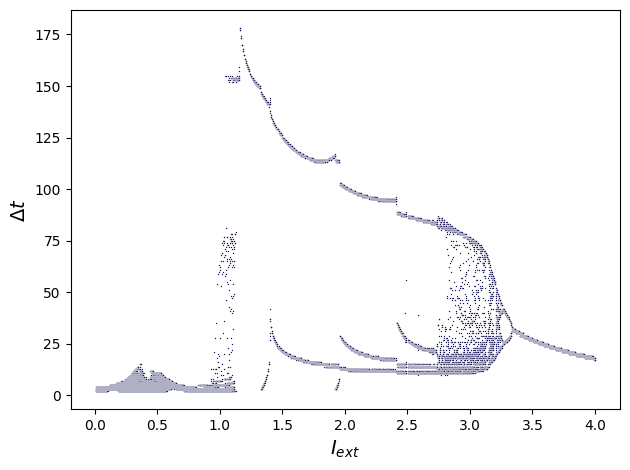

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data = peaks_df[(peaks_df["Time"] > 1000) & (peaks_df["I_ext"] > 0)], 
                x = "I_ext", y = "Time diff", 
                color = "xkcd:night blue",
                marker=".",
                legend = "",
                s = 4)
plt.xlabel("$I_{ext}$", fontsize = 14)
plt.ylabel("$\Delta t$", fontsize = 14)
plt.tight_layout()
plt.savefig("Figures/bifurcation_diagram.png", dpi = 400)
plt.show()

# Development

### Figure 2.1: star network

C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
C:\Users\javie\AppData\Local\Temp\ipykernel_16236\1775499239.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), label='Node degree')


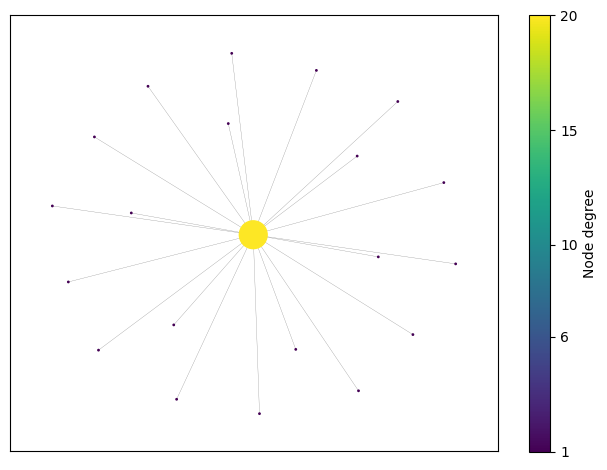

In [52]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

N = 20
graph = nx.star_graph(N)

# Compute the degree of each node
degree_dict = dict(graph.degree())
degrees = list(degree_dict.values())

# Define a color map and size scaling for the nodes
color_map = plt.cm.viridis 
min_degree = min(degrees)
max_degree = max(degrees)

# Normalize degrees for the color map
norm = plt.Normalize(vmin=min_degree, vmax=max_degree)

# Generate colors and sizes based on degrees
node_colors = [color_map(norm(degree)) for degree in degrees]
node_sizes = [degree ** 2 for degree in degrees]  # Adjust the multiplier as needed

nx.draw_networkx(
    graph, 
    with_labels=False, 
    node_color=node_colors, 
    node_size=node_sizes, 
    cmap=color_map, 
    edge_color='gray',
    width = 0.2,
)

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), label='Node degree')
cbar.set_ticks(np.round(np.linspace(min_degree, max_degree, 5)))

plt.tight_layout()
plt.savefig("Figures/6_star_nx.png", dpi = 200)
plt.show()

### Figure 2.2: comparison of integrators with different error tolerances

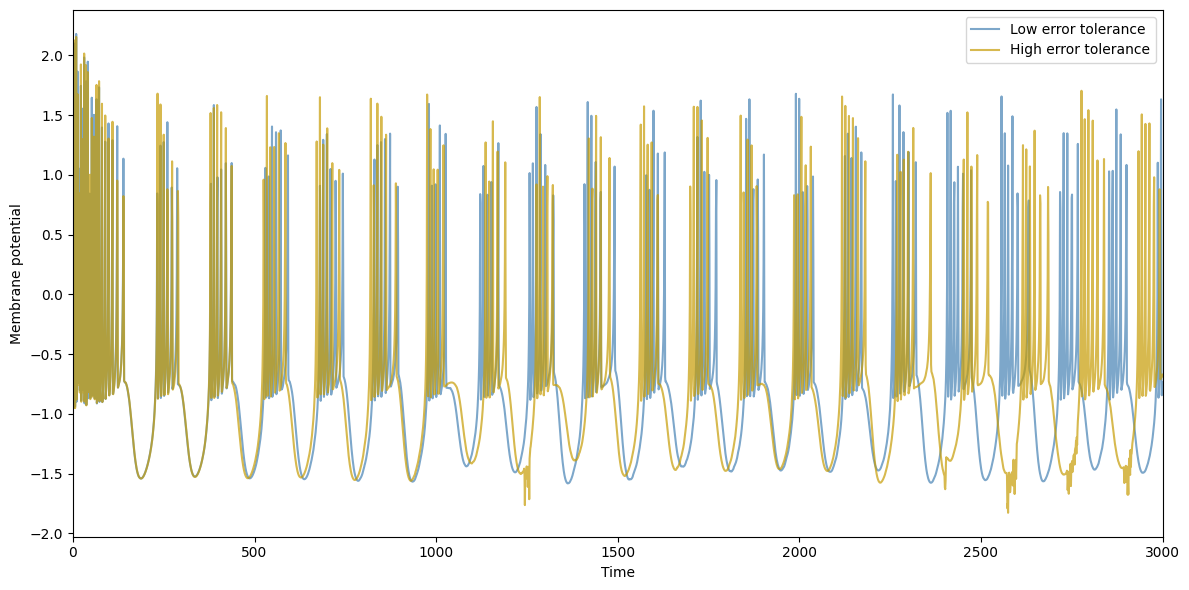

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from utils import simulation_HR, retrieve_network

path = 'networks/train'
solutions_path = "simulations/train"

# Simulation parameters------------------------
t_final = 3000
ppt = 1
tiempo = np.linspace(0, t_final, int(t_final * ppt)) #ppt valores por segundo
t_span = (0, t_final)

g = 0.01
N = 150
m = 2

graph = retrieve_network(N, m, 0, path)
laplacianMatrix = nx.laplacian_matrix(graph).todense()
condicionInicial = np.load(f"IVs/IV_{N}.npy")

x1, y, z = simulation_HR(N = N, t_final=t_final, ppt = ppt, 
                        laplacianMatrix=laplacianMatrix, 
                        condicionInicial= condicionInicial, 
                        g = g, method = "RK45",
                        atol = 1e-3,
                        rtol = 1e-3)
np.save("simulations/dummy.npy", x1)

# x2, y, z = simulation_HR(N = N, t_final=t_final, ppt = ppt, 
#                         laplacianMatrix=laplacianMatrix, 
#                         condicionInicial= condicionInicial, 
#                         g = g, method = "BDF")

key = f'N_{N}_m_{m}_{0}_g_{round(g,4)}'
x_good = np.load(f"{solutions_path}/x_{key}.npy")
x_bad = np.load("simulations/dummy.npy")

nrn = 0
plt.figure(figsize=(12,6))
plt.plot(tiempo, x_good[nrn], alpha = 0.7, label = "Low error tolerance", color = "steelblue")
plt.plot(tiempo, x_bad[nrn], alpha = 0.7, label = "High error tolerance", color = "xkcd:ocre")
plt.xlabel("Time")
plt.ylabel("Membrane potential")
plt.xlim(0,3000)
plt.legend()
plt.tight_layout()
plt.savefig("Figures/7_RK45_tol_comparison.png", dpi = 400)
plt.show()

### Figure 2.3: $x$ of two neurons using threshold

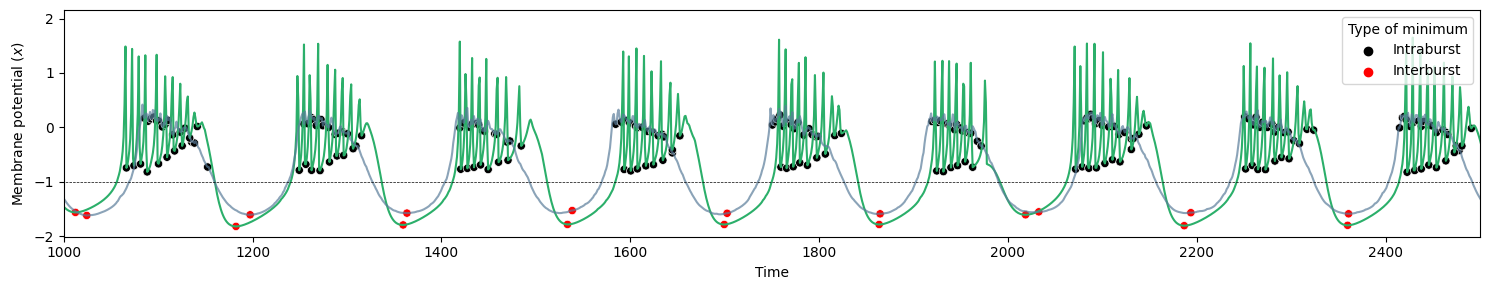

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from utils import get_valleys_df
import seaborn as sns

solutions_path = "simulations/train"
network_path = 'networks/train'
# Simulation parameters------------------------
t_final = 3000
ppt = 1
tiempo = np.linspace(0, t_final, int(t_final * ppt)) #ppt valores por segundo

N, m, i, g = 500, 3, 0, 0.0421
key = f'N_{N}_m_{m}_{i}_g_{round(g,4)}'
x = np.load(f"{solutions_path}/x_{key}.npy")
valleys_df = get_valleys_df(x, tiempo, only_manual=True, manual_threshold=-1.0)

plt.figure(figsize=(15,3))

plt.plot(tiempo, x[100], alpha = 1, color = "xkcd:jade green")
plt.plot(tiempo, x[0], alpha = 0.7, color = "xkcd:steel blue")

plt.hlines(-1, 0, 3000, linestyles = "dashed", color = "black", linewidth = 0.5)
ax = sns.scatterplot(data = valleys_df[(valleys_df["Neuron"] == 0) | (valleys_df["Neuron"] == 100)], x = "Time", y = "x", hue = "Type", palette = ["black", "red"])
ax.legend(title = "Type of minimum")
plt.xlim(1000,2500)
plt.ylabel("Membrane potential ($x$)")
plt.tight_layout()
plt.savefig("Figures/10_choosing_threshold.png", dpi = 400)
plt.show()

### Figure 2.4: cleaning minima

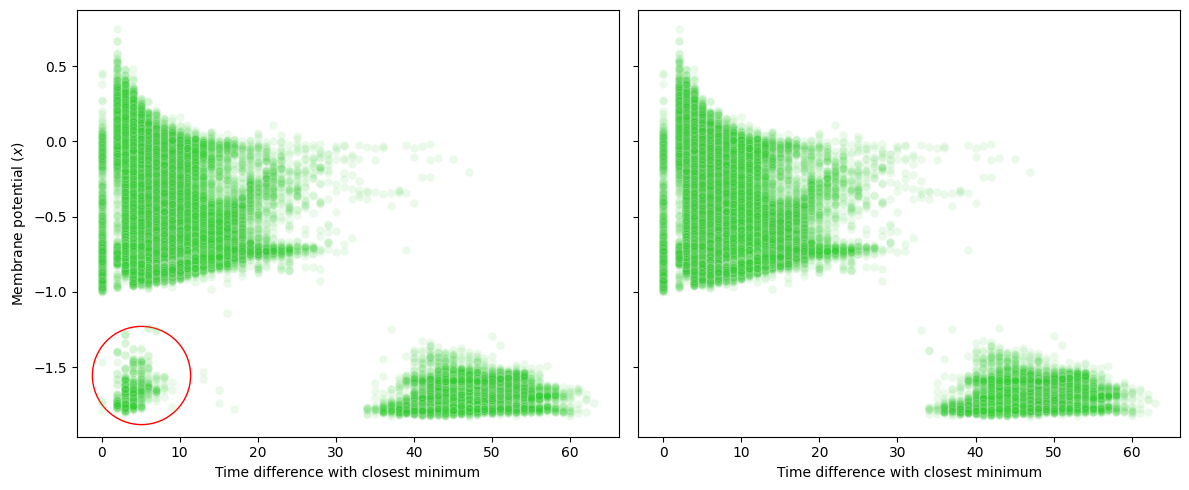

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from utils import extreme_finder, get_shortest_time_periods, separate_valleys_clustering, get_number_of_valleys_per_burst
from utils import get_valleys_df
import seaborn as sns
import pandas as pd

solutions_path = "simulations/train"
network_path = 'networks/train'
# Simulation parameters------------------------
t_final = 3000
ppt = 1
tiempo = np.linspace(0, t_final, int(t_final * ppt)) #ppt valores por segundo

N, m, i, g = 500, 3, 0, 0.0421
key = f'N_{N}_m_{m}_{i}_g_{round(g,4)}'
x = np.load(f"{solutions_path}/x_{key}.npy")

valleys = extreme_finder(x)
neuron_indices, time_indices = np.nonzero(valleys == 1)
valleys_df = pd.DataFrame({
    "Neuron" : pd.Series(neuron_indices),
    "Time index" : pd.Series(time_indices),
    "Time" : pd.Series(tiempo[time_indices]),
    "x" : pd.Series(x[neuron_indices, time_indices])
})
get_shortest_time_periods(valleys_df)

# valleys_df = separate_valleys_clustering(valleys_df, method = "birch", single_clustering=True, n_dim = 2)
valleys_df["Type"] = valleys_df["x"].apply(lambda x: "Interburst" if x <= -1.0 else "Intraburst")
# Calculate burst duration
valleys_df["Interburst time"] = valleys_df[valleys_df["Type"] == "Interburst"]["Time"].diff()

# Some valleys have negative time differences because they belong to different neurons. Set them to NaN
valleys_df.loc[(valleys_df["Type"] == "Interburst") & (valleys_df["Interburst time"] < 0), "Interburst time"] = np.nan

fig, axes = plt.subplots(1, 2, sharey = True, figsize = (12,5))
axes[0].scatter(5, -1.55, color = "white", edgecolors="red", s = 5000)
sns.scatterplot(data = valleys_df, x = "Min time diff", y = "x", alpha = 0.1, color = "limegreen", ax = axes[0])
axes[0].set_xlabel("Time difference with closest minimum")
axes[0].set_ylabel("Membrane potential ($x$)")

valleys_df = get_valleys_df(x, tiempo, "gaussian_mixture", manual_threshold=-1.05, single_clustering=False, n_dim = 2, only_manual = True)
sns.scatterplot(data = valleys_df, x = "Min time diff", y = "x", alpha = 0.1, color = "limegreen", ax = axes[1])
axes[1].set_xlabel("Time difference with closest minimum")
axes[1].set_ylabel("Membrane potential ($x$)")

plt.tight_layout()
plt.savefig("Figures/8_three_clusters.png", dpi = 400)
plt.show()

### Figure 2.5: comparison of the different automated burst identification methods

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from utils import get_valleys_df
import seaborn as sns

solutions_path = "simulations/train"
network_path = 'networks/train'
# Simulation parameters------------------------
t_final = 3000
ppt = 1
tiempo = np.linspace(0, t_final, int(t_final * ppt)) #ppt valores por segundo
t_span = (0, t_final)
# Thr, kmeans, GM, birch X sync, no sync. 8 diff figures
############################################################
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 3))
# SYNC
N, m, i, g = 500, 3, 0, 0.8
key = f'N_{N}_m_{m}_{i}_g_{round(g,4)}'
x = np.load(f"{solutions_path}/x_{key}.npy")
##################################
# THR
thr = -1.0
valleys_df = get_valleys_df(x, tiempo, "gaussian_mixture", manual_threshold=thr, single_clustering=False, n_dim = 2, only_manual = True)


sns.scatterplot(data = valleys_df, x = "Min time diff", y = "x", alpha = 0.1, hue = "Type", ax = axes[0])
axes[0].hlines(thr, xmin = np.min(valleys_df["Min time diff"]), xmax = np.max(valleys_df["Min time diff"]), linestyles = "dashed", color = "black")
axes[0].set_xlabel("Time difference with closest minimum")
axes[0].set_ylabel("Membrane potential ($x$)")

# No SYNC
N, m, i, g = 500, 3, 0, 0.0421
key = f'N_{N}_m_{m}_{i}_g_{round(g,4)}'
x = np.load(f"{solutions_path}/x_{key}.npy")
valleys_df = get_valleys_df(x, tiempo, "gaussian_mixture", manual_threshold=thr, single_clustering=False, n_dim = 2, only_manual = True)
sns.scatterplot(data = valleys_df, x = "Min time diff", y = "x", alpha = 0.1, hue = "Type", ax = axes[1])
axes[1].hlines(thr, xmin = np.min(valleys_df["Min time diff"]), xmax = np.max(valleys_df["Min time diff"]), linestyles = "dashed", color = "black")
axes[1].set_xlabel("Time difference with closest minimum")
axes[1].set_ylabel("Membrane potential ($x$)")

plt.tight_layout()
# plt.show()
plt.savefig("Figures/9_thr_cluster.png", dpi = 250)
plt.close()

############################################################
# Kmeans
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 3))
# SYNC
N, m, i, g = 500, 3, 0, 0.8
key = f'N_{N}_m_{m}_{i}_g_{round(g,4)}'
x = np.load(f"{solutions_path}/x_{key}.npy")
##################################
valleys_df = get_valleys_df(x, tiempo, "kmeans", manual_threshold=thr, single_clustering=True, n_dim = 2, only_manual = False)


sns.scatterplot(data = valleys_df, x = "Min time diff", y = "x", alpha = 0.1, hue = "Type", ax = axes[0])
axes[0].set_xlabel("Time difference with closest minimum")
axes[0].set_ylabel("Membrane potential ($x$)")

# No SYNC
N, m, i, g = 500, 3, 0, 0.0421
key = f'N_{N}_m_{m}_{i}_g_{round(g,4)}'
x = np.load(f"{solutions_path}/x_{key}.npy")
valleys_df = get_valleys_df(x, tiempo, "kmeans", manual_threshold=thr, single_clustering=True, n_dim = 2, only_manual = False)
sns.scatterplot(data = valleys_df, x = "Min time diff", y = "x", alpha = 0.1, hue = "Type", ax = axes[1])
axes[1].set_xlabel("Time difference with closest minimum")
axes[1].set_ylabel("Membrane potential ($x$)")

plt.tight_layout()
plt.savefig("Figures/9_kmeans_cluster.png", dpi = 250)

# plt.show()
plt.close()

############################################################
# GM
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 3))
# SYNC
N, m, i, g = 500, 3, 0, 0.8
key = f'N_{N}_m_{m}_{i}_g_{round(g,4)}'
x = np.load(f"{solutions_path}/x_{key}.npy")
##################################
valleys_df = get_valleys_df(x, tiempo, "gaussian_mixture", manual_threshold=thr, single_clustering=True, n_dim = 2, only_manual = False)


sns.scatterplot(data = valleys_df, x = "Min time diff", y = "x", alpha = 0.1, hue = "Type", ax = axes[0])
axes[0].set_xlabel("Time difference with closest minimum")
axes[0].set_ylabel("Membrane potential ($x$)")

# No SYNC
N, m, i, g = 500, 3, 0, 0.0421
key = f'N_{N}_m_{m}_{i}_g_{round(g,4)}'
x = np.load(f"{solutions_path}/x_{key}.npy")
valleys_df = get_valleys_df(x, tiempo, "gaussian_mixture", manual_threshold=thr, single_clustering=True, n_dim = 2, only_manual = False)
sns.scatterplot(data = valleys_df, x = "Min time diff", y = "x", alpha = 0.1, hue = "Type", ax = axes[1])
axes[1].set_xlabel("Time difference with closest minimum")
axes[1].set_ylabel("Membrane potential ($x$)")

plt.tight_layout()
plt.savefig("Figures/9_gm_cluster.png", dpi = 250)

# plt.show()
plt.close()

############################################################
# GM
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 3))
# SYNC
N, m, i, g = 500, 3, 0, 0.8
key = f'N_{N}_m_{m}_{i}_g_{round(g,4)}'
x = np.load(f"{solutions_path}/x_{key}.npy")
##################################
valleys_df = get_valleys_df(x, tiempo, "birch", manual_threshold=thr, single_clustering=True, n_dim = 2, only_manual = False)


sns.scatterplot(data = valleys_df, x = "Min time diff", y = "x", alpha = 0.1, hue = "Type", ax = axes[0])
axes[0].set_xlabel("Time difference with closest minimum")
axes[0].set_ylabel("Membrane potential ($x$)")

# No SYNC
N, m, i, g = 500, 3, 0, 0.0421
key = f'N_{N}_m_{m}_{i}_g_{round(g,4)}'
x = np.load(f"{solutions_path}/x_{key}.npy")
valleys_df = get_valleys_df(x, tiempo, "birch", manual_threshold=thr, single_clustering=True, n_dim = 2, only_manual = False)
sns.scatterplot(data = valleys_df, x = "Min time diff", y = "x", alpha = 0.1, hue = "Type", ax = axes[1])
axes[1].set_xlabel("Time difference with closest minimum")
axes[1].set_ylabel("Membrane potential ($x$)")

plt.tight_layout()
plt.savefig("Figures/9_birch_cluster.png", dpi = 250)
plt.close()

### Figure 2.6: $x$ and its phase interpolation

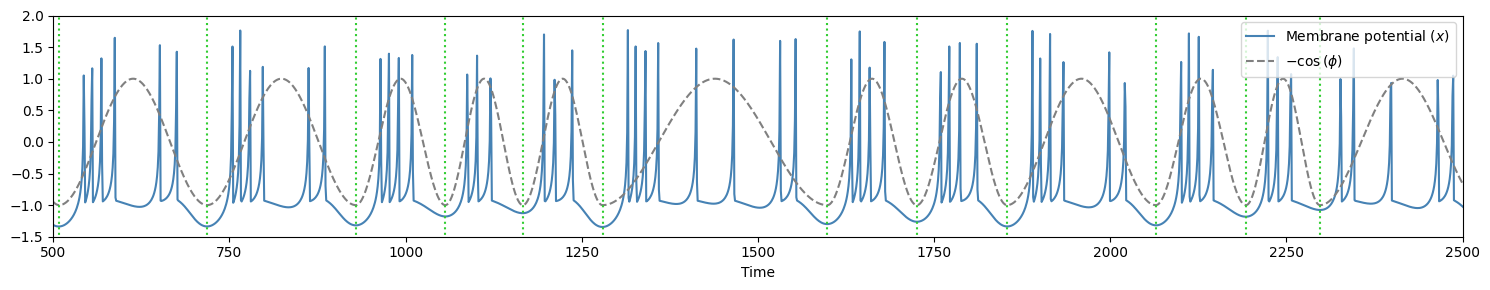

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from utils import get_valleys_df, interpolation_with_poincare_section

solutions_path = "simulations/train"
network_path = 'networks/train'
# Simulation parameters------------------------
t_final = 3000
ppt = 1
tiempo = np.linspace(0, t_final, int(t_final * ppt)) #ppt valores por segundo

N, m, i, g = 500, 3, 0, 0.8
key = f'N_{N}_m_{m}_{i}_g_{round(g,4)}'
x = np.load(f"{solutions_path}/x_{key}.npy")

valleys_df = get_valleys_df(x, tiempo, "gaussian_mixture", manual_threshold=-1.05, single_clustering=True, n_dim = 1, only_manual = True)
phi = interpolation_with_poincare_section(x, valleys_df)

plt.figure(figsize=(15,3))
plt.plot(tiempo, x[0], color = "steelblue", label = "Membrane potential ($x$)")
plt.plot(tiempo, - np.cos(phi[0]), linestyle = "dashed", color = "gray", label = "$-\cos{(\phi)}$")

plt.vlines(valleys_df.loc[(valleys_df["Neuron"] == 0) & (valleys_df["Type"] == "Interburst"), "Time"].to_numpy(), -2, 3,
           linestyles = "dotted",
           color = "limegreen")

plt.xlabel("Time")
plt.xlim(500,2500)
plt.ylim(-1.5, 2)
plt.legend()
plt.tight_layout()
plt.savefig("Figures/11_interpolation.png", dpi = 400)
plt.show()

# Results and discussion

### Figure 3.1: synchronization of star network

In [27]:
import networkx as nx
import numpy as np
from utils import simulation_HR, cross_correlation_synchronization, interpolation_with_poincare_section, synchronization_measure, get_valleys_df
from time import perf_counter
import os
import matplotlib.pyplot as plt

N = 21
graph = nx.star_graph(N-1)
laplacianMatrix = nx.laplacian_matrix(graph).todense()

# Simulation parameters------------------------
t_final = 3000
ppt = 1
tiempo = np.linspace(0, t_final, int(t_final * ppt)) #ppt valores por segundo
t_span = (0, t_final)
condicionInicial = np.random.rand(3 * N)

# Model parameters-----------------------------
# g_list = np.concatenate([np.linspace(0, 0.25, 20), np.linspace(0.25, 0.5, 20)])
g_list = np.linspace(0, 0.8, 40)
# g_list = np.logspace(-2, 2, 10)
for g in g_list:
    start = perf_counter()
    if os.path.exists(f"simulations/train/star_g_{g}.npy"):
        continue
    print(f"Simulating for g = {round(g,4)}...", end = " ")
    x, y, z = simulation_HR(N = N, t_final=t_final, ppt = ppt, 
                            laplacianMatrix=laplacianMatrix, 
                            condicionInicial= condicionInicial, 
                            g = g, method = "RK45", 
                            rtol = 1e-8, atol = 1e-8)
    np.save(f"simulations/train/star_g_{g}.npy", x)
    end = perf_counter()
    print(f"It took {round(end - start, 3)} s")


cc_list = []
kura_list = []
for g in g_list:
    x = np.load(f"simulations/train/star_g_{g}.npy")
    cc = cross_correlation_synchronization(x)
    print(g)
    valleys_df = get_valleys_df(x, tiempo, only_manual=True, manual_threshold=-1.0)
    kura = synchronization_measure(interpolation_with_poincare_section(x, valleys_df))

    cc_list.append(cc)
    kura_list.append(kura)

Simulating for g = 0.8... It took 15.716 s
0.0
0.020512820512820513
0.041025641025641026
0.06153846153846154
0.08205128205128205
0.10256410256410256
0.12307692307692308
0.14358974358974358
0.1641025641025641
0.18461538461538463
0.20512820512820512
0.22564102564102564
0.24615384615384617
0.26666666666666666
0.28717948717948716
0.3076923076923077
0.3282051282051282
0.3487179487179487
0.36923076923076925
0.38974358974358975
0.41025641025641024
0.4307692307692308
0.4512820512820513
0.4717948717948718
0.49230769230769234
0.5128205128205128
0.5333333333333333
0.5538461538461539
0.5743589743589743
0.5948717948717949
0.6153846153846154
0.6358974358974359
0.6564102564102564
0.676923076923077
0.6974358974358974
0.717948717948718
0.7384615384615385
0.7589743589743589
0.7794871794871795
0.8


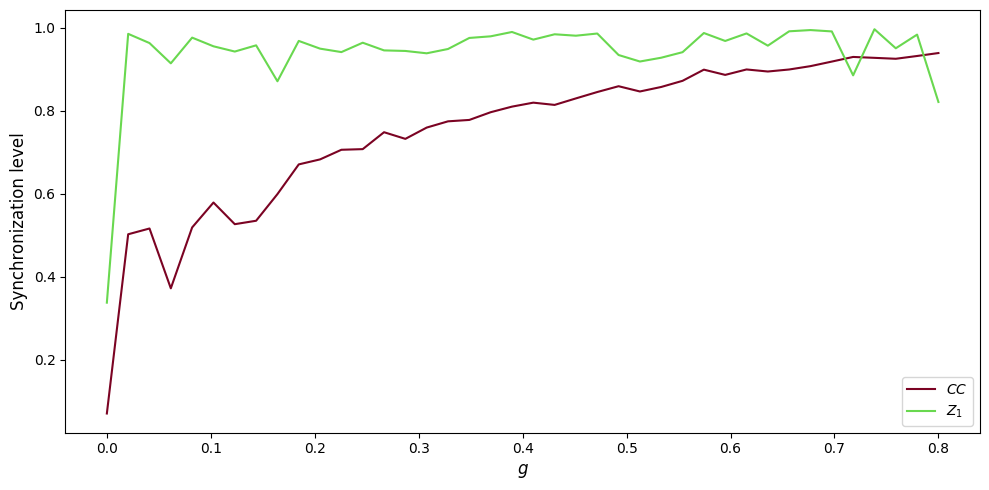

In [38]:
plt.figure(figsize = (10, 5))
plt.plot(g_list, cc_list, label = "$CC$", color = "xkcd:wine red")
plt.plot(g_list, kura_list, label = "$Z_1$", color = "xkcd:fresh green")
plt.legend()
plt.xlabel("$g$", fontsize = 12)
plt.ylabel("Synchronization level", fontsize = 12)
plt.tight_layout()
plt.savefig("Figures/3_1_synch_star.png", dpi = 400)
plt.show()

### Figure 3.2: star rasterplots

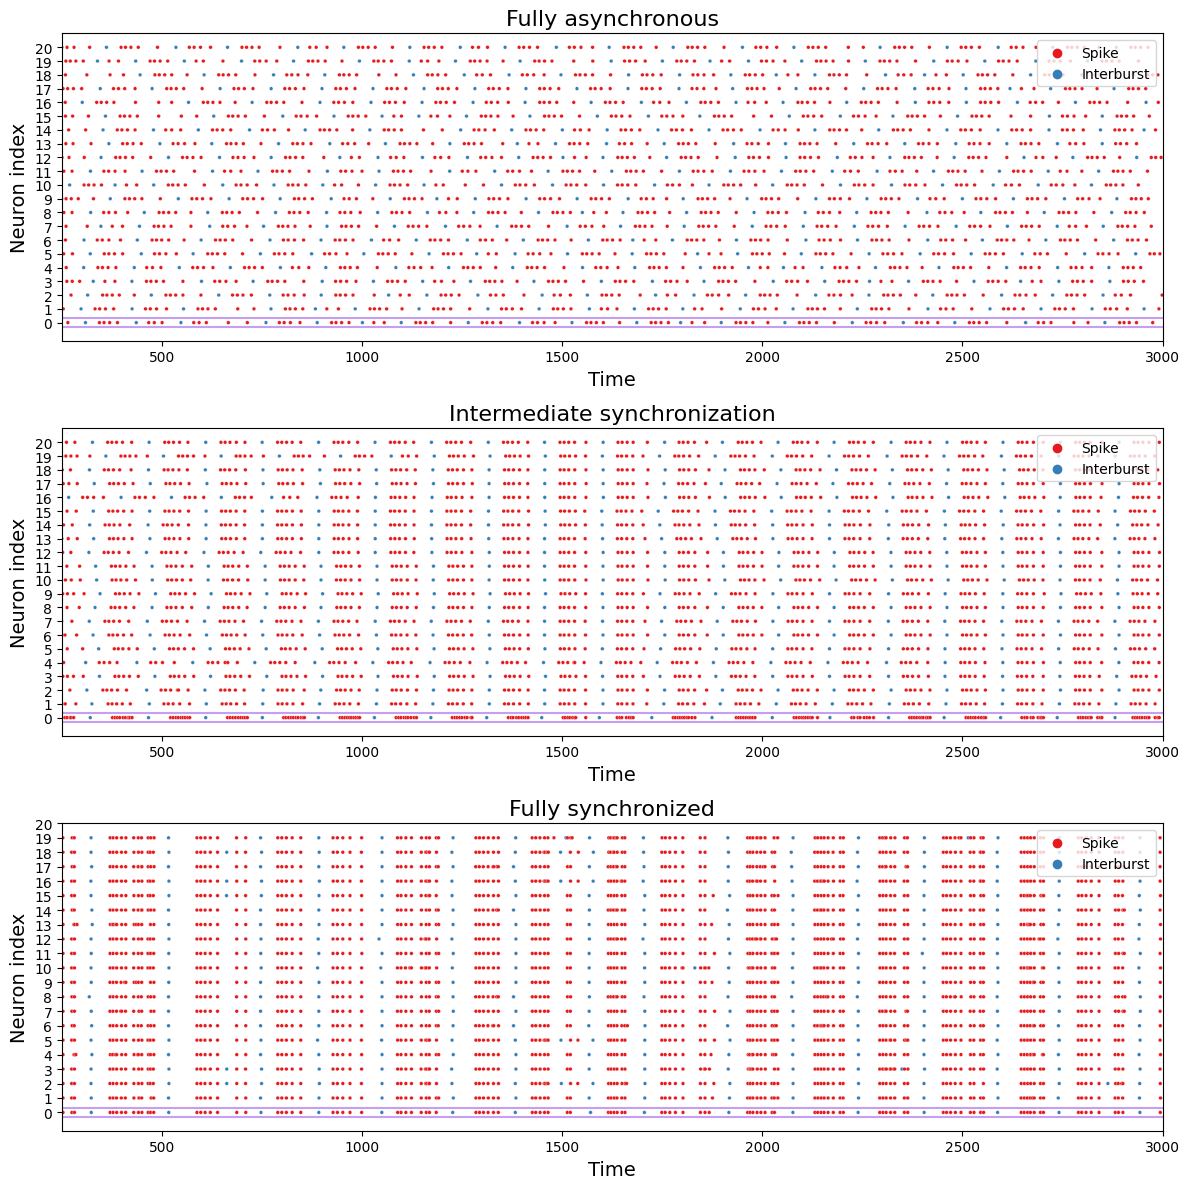

In [67]:
from utils import get_valleys_df, get_peaks_df, simulation_HR, synchronization_measure, cross_correlation_synchronization, interpolation_with_poincare_section
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from time import perf_counter

N = 21
graph = nx.star_graph(N-1)
laplacianMatrix = nx.laplacian_matrix(graph).todense()

# Simulation parameters------------------------
t_final = 3000
ppt = 2
tiempo = np.linspace(0, t_final, int(t_final * ppt)) #ppt valores por segundo
t_span = (0, t_final)
condicionInicial = np.random.rand(3 * N)

# Model parameters-----------------------------
g_list = [0, 0.02, 0.8]
fig, axes = plt.subplots(3, 1, figsize = (12, 12))
for g, ax in zip(g_list, axes):
    x = np.load(f"simulations/train/star_g_{g}.npy")
    valleys_df = get_valleys_df(x, tiempo, only_manual=True, manual_threshold=-1.0)
    peaks_df = get_peaks_df(x, tiempo, valleys_df)
    sns.scatterplot(data = peaks_df, x = "Time", y = "Neuron", hue = "Type", s = 7, palette = "Set1", ax = ax)
    ax.hlines(np.linspace(-0.3, 0.3, 2), 0, 3000, alpha = 1, color = "xkcd:lavender")
    ax.set_yticks(np.linspace(0, N-1, N))

    # Measure amplitude and phase synchronization
    # kura = synchronization_measure(interpolation_with_poincare_section(x, valleys_df))
    # cc = cross_correlation_synchronization(x)

    ax.yaxis.set_tick_params(labelsize = 10)
    ax.set_xlim(250,3000)
    if g == 0:
        word = "Fully asynchronous"
    elif g == 0.02:
        word = "Intermediate synchronization"
    else:
        word = "Fully synchronized"
    ax.set_title(f"{word}", fontsize = 16)
    # $g = {g} \\rightarrow \\:CC = {round(cc, 3)},\\: Z_1 = {round(kura,3)}$\n 
    ax.legend(title = "", loc = 1)
    ax.set_ylabel("Neuron index", fontsize = 14)
    ax.set_xlabel("Time", fontsize = 14)
plt.tight_layout()
plt.savefig("Figures/star_rasterplots.png", dpi = 400)
plt.show()

### Figure 3.3: boxplot of the number of peaks

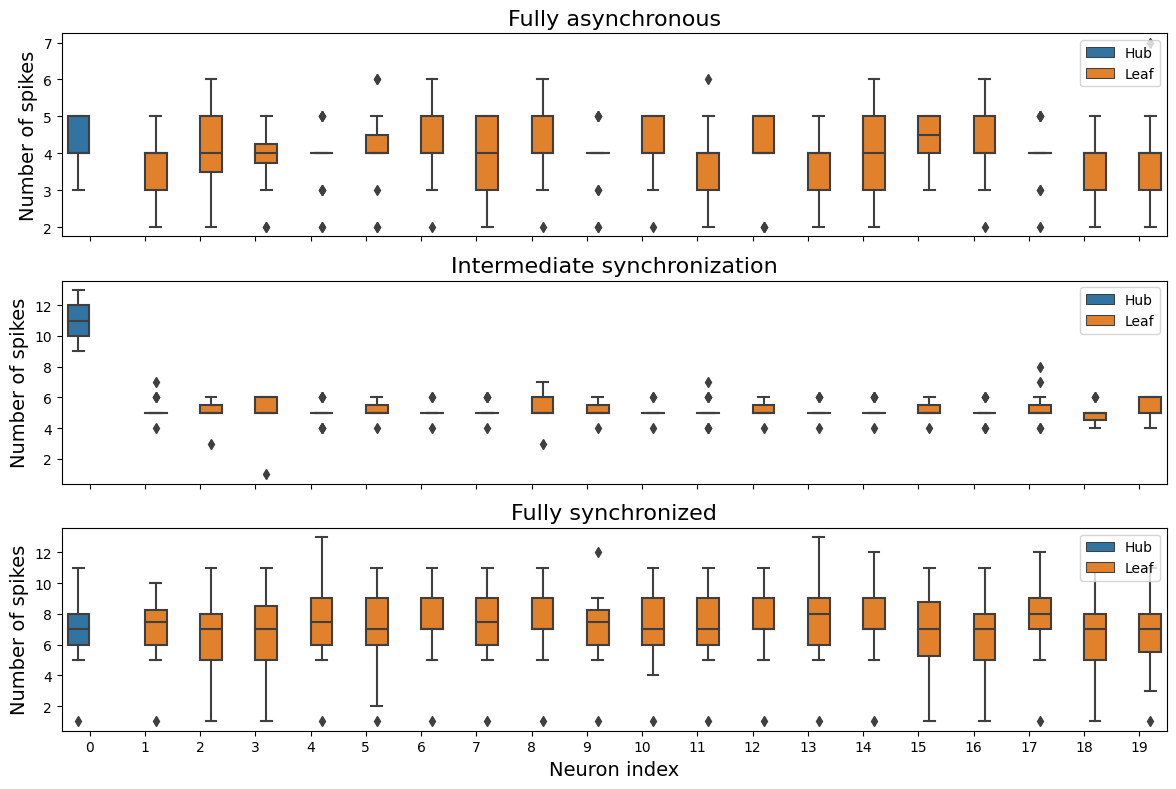

In [68]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from utils import get_valleys_df, get_peaks_df

g_list = np.linspace(0, 0.8, 40)
t_final = 3000
ppt = 2
tiempo = np.linspace(0, t_final, int(t_final * ppt)) #ppt valores por segundo

fig, axes = plt.subplots(3, 1, figsize = (12, 8), sharex = True)
for g, ax in zip((g_list[0], g_list[3], g_list[-1]), axes):
    x = np.load(f"simulations/train/star_g_{g}.npy")
    valleys_df = get_valleys_df(x, tiempo, only_manual=True, manual_threshold=-1.0)
    peaks_df = get_peaks_df(x, tiempo, valleys_df)
    peaks_df["Role"] = peaks_df["Neuron"].apply(lambda x: "Hub" if x == 0 else "Leaf")
    sns.boxplot(data = peaks_df, x = "Neuron", y = "Number of spikes", ax = ax, hue = "Role")
    ax.legend(loc = 1)

    if g == 0:
        word = "Fully asynchronous"
    elif g == g_list[3]:
        word = "Intermediate synchronization"
    else:
        word = "Fully synchronized"
    ax.set_title(f"{word}", fontsize = 16)
    ax.set_ylabel("Number of spikes", fontsize = 14)

    if (ax == axes[0] or ax == axes[1]):
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Neuron index", fontsize = 14)
plt.tight_layout()
plt.savefig("Figures/3_3_star_boxplot.png", dpi = 300)
plt.show()


### Figure 3.4: scale-free rasterplots

0.21019773462334534 0.0675654392877507
0.21019773462334534 0.0675654392877507
0.21019773462334534 0.0675654392877507


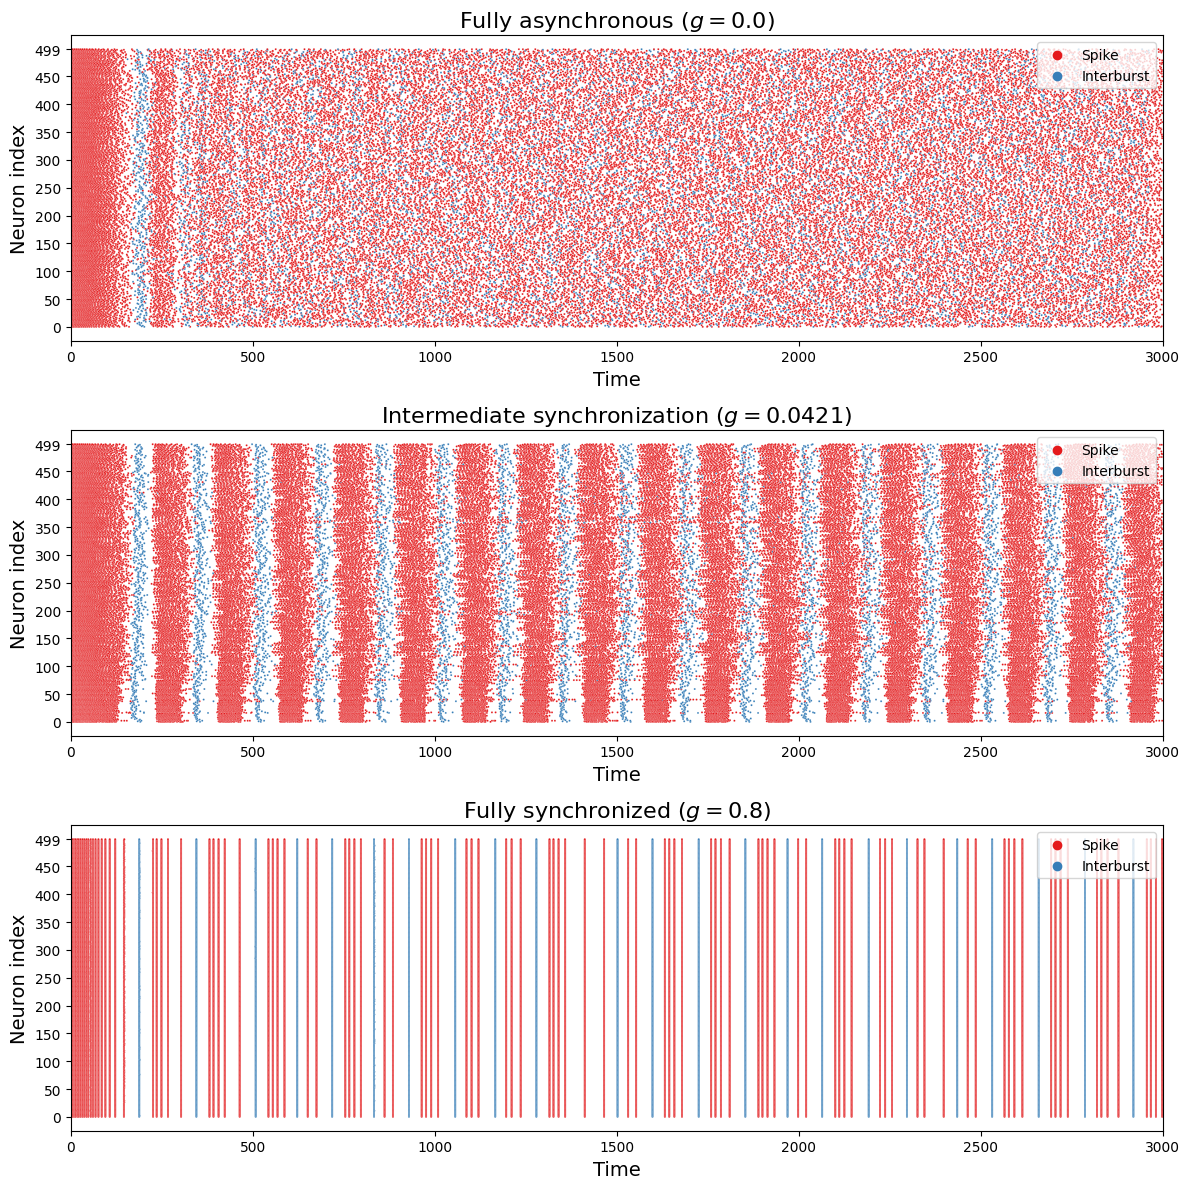

In [71]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from utils import get_valleys_df, get_peaks_df, synchronization_measure, interpolation_with_poincare_section, cross_correlation_synchronization

# Simulation parameters------------------------
t_final = 3000
ppt = 1
tiempo = np.linspace(0, t_final, int(t_final * ppt)) #ppt valores por segundo

g_list = np.linspace(0, 0.8, 20)
g_list_small = g_list[0], g_list[1], g_list[-1]
N, m, i = (500, 3, 0)

# Model parameters-----------------------------
fig, axes = plt.subplots(3, 1, figsize = (12, 12))
for g, ax in zip(g_list_small, axes):
    key = f"N_{N}_m_{m}_{i}_g_{round(g, 4)}"
    x = np.load(f"simulations/train/x_{key}.npy")
    valleys_df = get_valleys_df(x, tiempo, only_manual=True, manual_threshold=-1.0)
    peaks_df = get_peaks_df(x, tiempo, valleys_df)
    sns.scatterplot(data = peaks_df, x = "Time", y = "Neuron", hue = "Type", s = 2, palette = "Set1", ax = ax)
    # ax.hlines(np.linspace(-0.3, 0.3, 2), 0, 3000, alpha = 1, color = "xkcd:lavender")
    ax.set_yticks(np.concatenate([range(0, N, 50), np.array([499])]))

    # Measure amplitude and phase synchronization
    # kura = synchronization_measure(interpolation_with_poincare_section(x, valleys_df))
    # cc = cross_correlation_synchronization(x)
    print(kura, cc)
    ax.yaxis.set_tick_params(labelsize = 10)
    ax.set_xlim(0,3000)
    if g == 0:
        word = f"Fully asynchronous ($g = {round(g, 4)}$)"
    elif g == g_list[1]:
        word = f"Intermediate synchronization ($g = {round(g, 4)}$)"
    else:
        word = f"Fully synchronized ($g = {round(g, 4)}$)"
    ax.set_title(f"{word}", fontsize = 16)
    # $g = {g} \\rightarrow \\:CC = {round(cc, 3)},\\: Z_1 = {round(kura,3)}$\n 
    ax.legend(title = "", loc = 1)
    ax.set_ylabel("Neuron index", fontsize = 14)
    ax.set_xlabel("Time", fontsize = 14)
plt.tight_layout()
plt.savefig("Figures/sf_rasterplots.png", dpi = 400)
plt.show()

### Figure 3.5: degree vs number of peaks mosaic

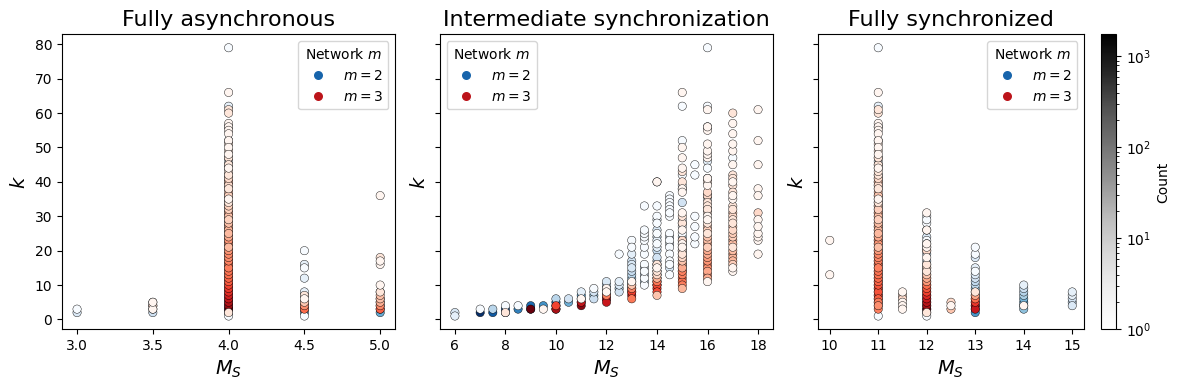

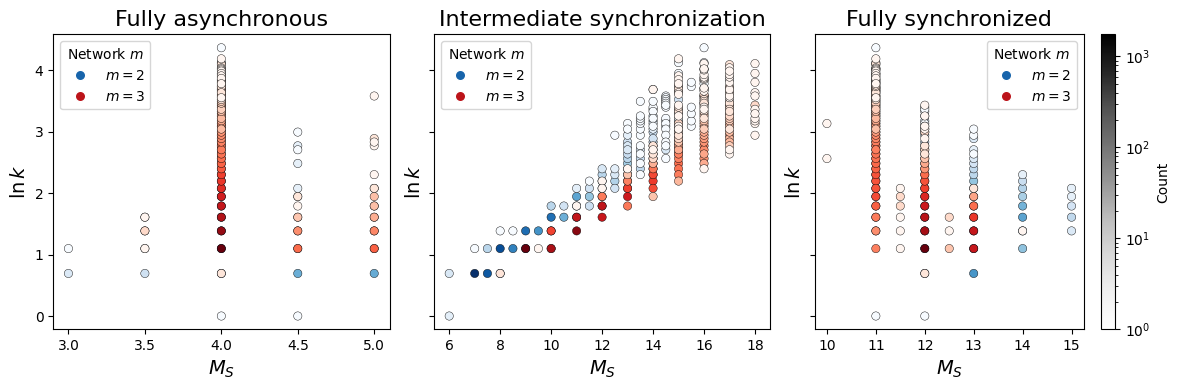

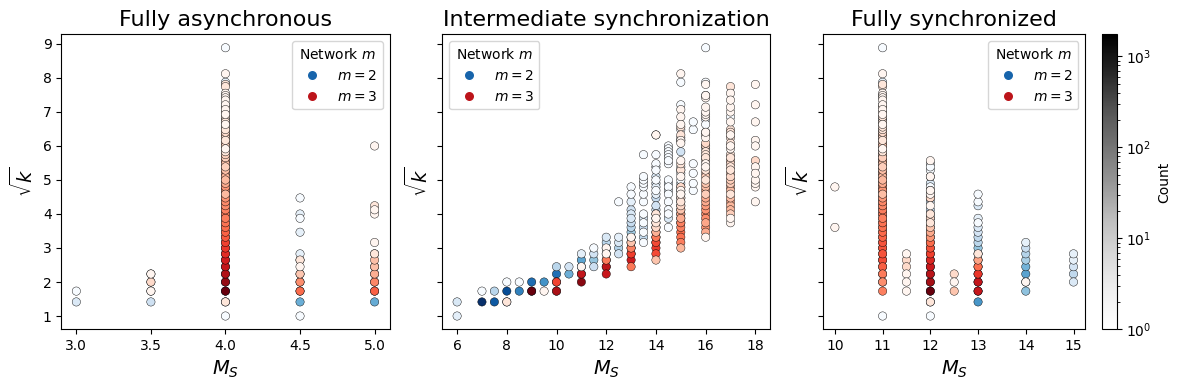

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm
from matplotlib.lines import Line2D
import pandas as pd
import statsmodels.api as sm

# g_list = np.concatenate([[0], np.logspace(-2,0,10)])
g_list = np.linspace(0, 0.25, 20)
solutions_path = "simulations/train"

neuron_df = pd.read_csv(f"{solutions_path}/neuron_df.csv", index_col=0)
neuron_df.loc[:, "ln Degree"] = np.log(neuron_df["Degree"])
neuron_df.loc[:, "sqrt Degree"] = np.sqrt(neuron_df["Degree"])

legend_elements = [Line2D([0], [0], marker='.', color = "w", markerfacecolor=plt.cm.Blues(0.8), label=f'$m = 2$', markersize=15),
                  Line2D([0], [0], marker='.', color = "w", markerfacecolor=plt.cm.Reds(0.8), label=f'$m = 3$', markersize=15)]

# Raw points

fig, axes = plt.subplots(1, 3, figsize = (12, 4), sharey = True)
for ax, g in zip(axes, (g_list[0], g_list[5], g_list[-1])):
    for m, cmap in zip((2,3), (plt.cm.Blues, plt.cm.Reds)):
        df = neuron_df.loc[(neuron_df["g"] == round(g,4)) & (neuron_df["m"] == m), ["key", "N", "m", "Number of peaks", "Degree", "ln Degree", "sqrt Degree", "g"]]
        df = df.groupby(["Number of peaks", "Degree"]).count().reset_index().loc[:, ["Number of peaks", "Degree", "key"]].rename(columns={"key":"count"}).sort_values(by = "count", ascending = False)
        norm = cm.LogNorm(vmin = np.min(df["count"]), vmax = np.max(df["count"]))
        ax.scatter(
            x = df["Number of peaks"],
            y = df["Degree"],
            edgecolors="black",
            linewidth = 0.3,
            c = cmap(norm(df["count"]))
        )
    ax.set_xlabel("$M_S$", fontsize = 14)
    ax.set_ylabel("$k$", fontsize = 14)
    if g == 0:
        word = f"Fully asynchronous"
    elif g == g_list[5]:
        word = f"Intermediate synchronization"
    else:
        word = f"Fully synchronized"
    ax.set_title(f"{word}", fontsize = 16)
    ax.legend(title = "Network $m$", handles = legend_elements)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Greys), 
             label='Count', 
             ax = plt.gca())
plt.tight_layout()
plt.savefig("Figures/3_5_raw.png", dpi = 400)
plt.show()
plt.close()

# Ln Degree
fig, axes = plt.subplots(1, 3, figsize = (12, 4), sharey = True)
for ax, g in zip(axes, (g_list[0], g_list[5], g_list[-1])):
    for m, cmap in zip((2,3), (plt.cm.Blues, plt.cm.Reds)):
        df = neuron_df.loc[(neuron_df["g"] == round(g,4)) & (neuron_df["m"] == m), ["key", "N", "m", "Number of peaks", "Degree", "ln Degree", "sqrt Degree", "g"]]
        df = df.groupby(["Number of peaks", "ln Degree"]).count().reset_index().loc[:, ["Number of peaks", "ln Degree", "key"]].rename(columns={"key":"count"}).sort_values(by = "count", ascending = False)
        norm = cm.LogNorm(vmin = np.min(df["count"]), vmax = np.max(df["count"]))
        ax.scatter(
            x = df["Number of peaks"],
            y = df["ln Degree"],
            edgecolors="black",
            linewidth = 0.3,
            c = cmap(norm(df["count"]))
        )
    ax.set_xlabel("$M_S$", fontsize = 14)
    ax.set_ylabel("$\ln{k}$", fontsize = 14)
    if g == 0:
        word = f"Fully asynchronous"
    elif g == g_list[5]:
        word = f"Intermediate synchronization"
    else:
        word = f"Fully synchronized"
    ax.set_title(f"{word}", fontsize = 16)
    ax.legend(title = "Network $m$", handles = legend_elements)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Greys), 
             label='Count', 
             ax = plt.gca())
plt.tight_layout()
plt.savefig("Figures/3_5_ln.png", dpi = 400)
plt.show()
plt.close()

# sqrt(degree)
fig, axes = plt.subplots(1, 3, figsize = (12, 4), sharey = True)
for ax, g in zip(axes, (g_list[0], g_list[5], g_list[-1])):
    for m, cmap in zip((2,3), (plt.cm.Blues, plt.cm.Reds)):
        df = neuron_df.loc[(neuron_df["g"] == round(g,4)) & (neuron_df["m"] == m), ["key", "N", "m", "Number of peaks", "Degree", "ln Degree", "sqrt Degree", "g"]]
        df = df.groupby(["Number of peaks", "sqrt Degree"]).count().reset_index().loc[:, ["Number of peaks", "sqrt Degree", "key"]].rename(columns={"key":"count"}).sort_values(by = "count", ascending = False)
        norm = cm.LogNorm(vmin = np.min(df["count"]), vmax = np.max(df["count"]))
        ax.scatter(
            x = df["Number of peaks"],
            y = df["sqrt Degree"],
            edgecolors="black",
            linewidth = 0.3,
            c = cmap(norm(df["count"]))
        )
    ax.set_xlabel("$M_S$", fontsize = 14)
    ax.set_ylabel("$\sqrt{k}$", fontsize = 14)
    if g == 0:
        word = f"Fully asynchronous"
    elif g == g_list[5]:
        word = f"Intermediate synchronization"
    else:
        word = f"Fully synchronized"
    ax.set_title(f"{word}", fontsize = 16)
    ax.legend(title = "Network $m$", handles = legend_elements)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Greys), 
             label='Count', 
             ax = plt.gca(),)
plt.tight_layout()
plt.savefig("Figures/3_5_sqrt.png", dpi = 400)
plt.show()


### Figure 3.6: evolution of $R^2$ with SLR

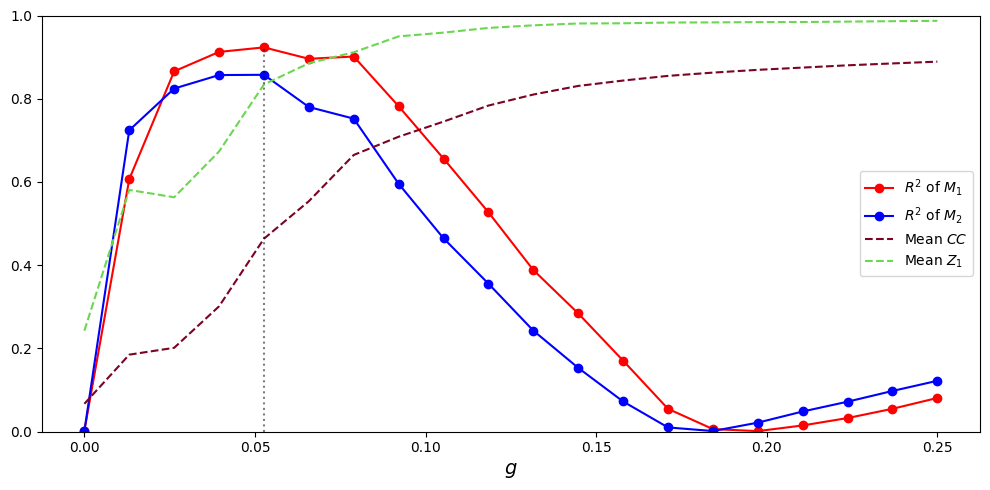

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# g_list = np.concatenate([[0], np.logspace(-2,0,10)])
g_list = np.linspace(0, 0.25, 20)
solutions_path = "simulations/train"

neuron_df = pd.read_csv(f"{solutions_path}/neuron_df.csv", index_col=0)
neuron_df.loc[:, "ln Degree"] = np.log(neuron_df["Degree"])
neuron_df.loc[:, "sqrt Degree"] = np.sqrt(neuron_df["Degree"])

df = neuron_df.loc[:, ["Number of peaks", "Degree", "ln Degree", "sqrt Degree", "g", "Amplitude sync", "Phase sync"]]

m1_r2 = []
m2_r2 = []
for g in g_list:
    df = neuron_df.loc[(neuron_df["g"] == round(g, 4)), ["Number of peaks", "Degree", "ln Degree", "sqrt Degree", "g", "Amplitude sync", "Phase sync"]]
    X = sm.add_constant(df["Number of peaks"])
    y_1 = df["ln Degree"]
    lm1 = sm.OLS(y_1, X).fit()
    y_2 = df["sqrt Degree"]
    lm2 = sm.OLS(y_2, X).fit()
    m1_r2.append(lm1.rsquared)
    m2_r2.append(lm2.rsquared)

plt.figure(figsize=(10, 5))
plt.plot(g_list, m1_r2, "-o", color = "red", label = "$R^2$ of $M_1$")
plt.plot(g_list, m2_r2, "-o", color = "blue", label = "$R^2$ of $M_2$")
plt.plot(g_list, neuron_df.groupby("g").mean("Amplitude sync")["Amplitude sync"].values, "--", color = "xkcd:wine red", label = "Mean $CC$")
plt.plot(g_list, neuron_df.groupby("g").mean("Phase sync")["Phase sync"].values, "--", color = "xkcd:fresh green", label = "Mean $Z_1$")
plt.vlines(x = g_list[m1_r2.index(max(m1_r2))], ymin = 0, ymax = max(m1_r2), alpha = 0.5, color = "k", linestyle = "dotted")

plt.xlabel("$g$", fontsize = 14)
plt.legend()
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("Figures/3_6_evolution_of_r2.png", dpi = 400)
plt.show()

### Figure 3.7

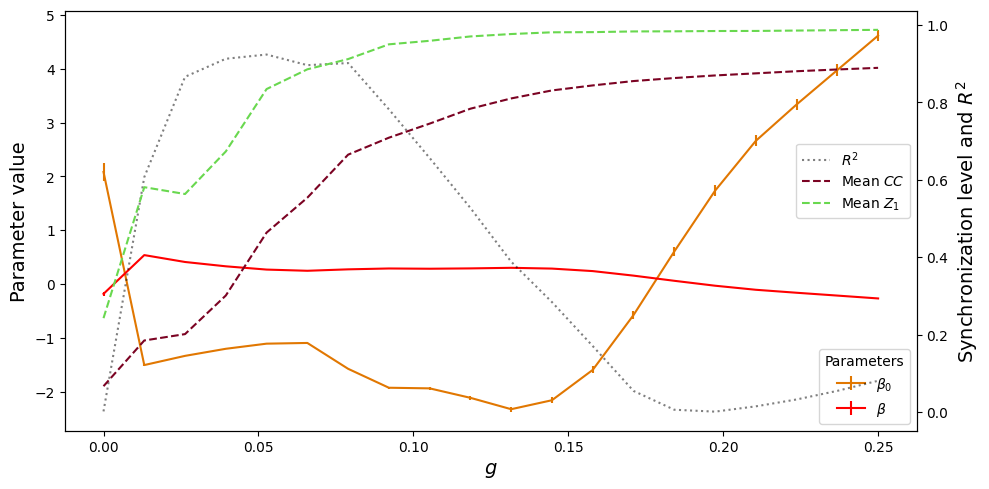

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm
from matplotlib.lines import Line2D
import pandas as pd
import statsmodels.api as sm

# g_list = np.concatenate([[0], np.logspace(-2,0,10)])
g_list = np.linspace(0, 0.25, 20)
solutions_path = "simulations/train"

neuron_df = pd.read_csv(f"{solutions_path}/neuron_df.csv", index_col=0)
neuron_df.loc[:, "ln Degree"] = np.log(neuron_df["Degree"])
neuron_df.loc[:, "sqrt Degree"] = np.sqrt(neuron_df["Degree"])

df = neuron_df.loc[:, ["Number of peaks", "Degree", "ln Degree", "sqrt Degree", "g", "Amplitude sync", "Phase sync"]]

mc_intercept = []
mc_beta = []
intercept_se = []
beta_se = []
for g in g_list:
    df = neuron_df.loc[(neuron_df["g"] == round(g, 4)), ["Number of peaks", "Degree", "ln Degree", "sqrt Degree", "g", "Amplitude sync", "Phase sync"]]
    X = sm.add_constant(df["Number of peaks"])
    y_1 = df["ln Degree"]
    lmc = sm.OLS(y_1, X).fit()
    mc_intercept.append(lmc.params[0])
    mc_beta.append(lmc.params[1])
    intercept_se.append(lmc.bse[0])
    beta_se.append(lmc.bse[1])
    lmc.summary()

fig, ax = plt.subplots(figsize=(10, 5))
# plt.plot(g_list, m1_intercept, "-o", color = "red", label = "$\\beta_0$")
# plt.plot(g_list, m1_beta, "-o", color = "blue", label = "$\\beta$")
ax.errorbar(g_list, mc_intercept,yerr = intercept_se,  linestyle = "-", color = "xkcd:pumpkin", label = "$\\beta_0$")
ax.errorbar(g_list, mc_beta, yerr = np.array(beta_se), linestyle = "-", color = "red", label = "$\\beta$")

ax2 = ax.twinx()
ax2.plot(g_list, m1_r2, color = "black", linestyle = "dotted", alpha = 0.5, label = "$R^2$")
ax2.plot(g_list, neuron_df.groupby("g").mean("Amplitude sync")["Amplitude sync"].values, "--", color = "xkcd:wine red", label = "Mean $CC$")
ax2.plot(g_list, neuron_df.groupby("g").mean("Phase sync")["Phase sync"].values, "--", color = "xkcd:fresh green", label = "Mean $Z_1$")
# plt.vlines(x = g_list[m1_r2.index(max(m1_r2))], ymin = 0, ymax = max(m1_r2), alpha = 0.5, color = "k", linestyle = "dotted")

plt.xlabel("$g$", fontsize = 14)
ax.legend(title = "Parameters", loc = 4)
ax2.legend(bbox_to_anchor = (1,0.70))
ax2.set_ylabel("Synchronization level and $R^2$", fontsize = 14)
ax.set_ylabel("Parameter value", fontsize = 14)
ax.set_xlabel("$g$", fontsize = 14)
# plt.ylim(0,1)
plt.tight_layout()
plt.savefig("Figures/3_7_evolution_of_parameters.png", dpi = 400)
plt.show()

In [52]:
lmc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln Degree   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     637.6
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:52:55   Log-Likelihood:                -8933.2
No. Observations:               10500   AIC:                         1.787e+04
Df Residuals:                   10496   BIC:                         1.790e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.6777      0.122     22.017      0.000       2.439       2.916
Number of peaks    -0.1822      0.009    -20.327      0.000      -0.200      -0.165
m                   0.3511      0.012     30.021      0.000       0.328       0.374
N                3.905e-05   3.28e-05      1.190      0.234   -2.53e-05       0.000
==============================================================================
Omnibus:                     2151.103   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3968.168
Skew:                           1.285   Prob(JB):                         0.00
Kurtosis:                       4.571   Cond. No.                     8.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
pd.DataFrame({
    "g" : g_list,
    "Mean $CC$" : neuron_df.groupby("g").mean("Amplitude sync")["Amplitude sync"].values,
    "Mean $Z_1$" : neuron_df.groupby("g").mean("Phase sync")["Phase sync"].values,
    "$R^2$" : m1_r2,
    "$\\beta_0$" : mc_intercept,
    "$\\beta$" : mc_beta,
    "SE intercept" : intercept_se,
    "SE slope" : beta_se
}).to_latex("parameters.tex")

### Figure 3.8: full MLR model

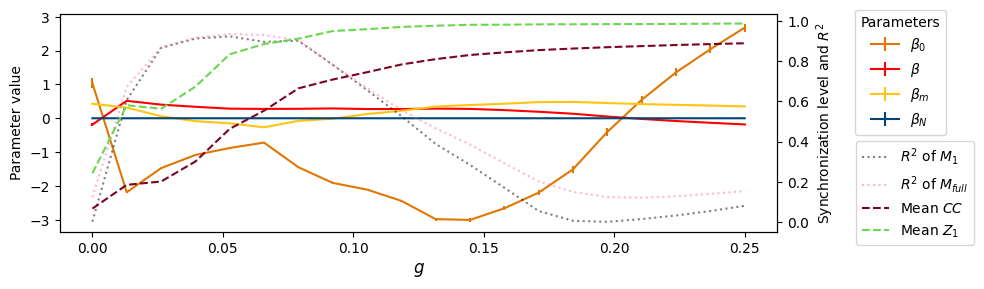

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm
from matplotlib.lines import Line2D
import pandas as pd
import statsmodels.api as sm

# g_list = np.concatenate([[0], np.logspace(-2,0,10)])
g_list = np.linspace(0, 0.25, 20)
solutions_path = "simulations/train"

neuron_df = pd.read_csv(f"{solutions_path}/neuron_df.csv", index_col=0)
neuron_df.loc[:, "ln Degree"] = np.log(neuron_df["Degree"])
neuron_df.loc[:, "sqrt Degree"] = np.sqrt(neuron_df["Degree"])

df = neuron_df.loc[:, ["N", "m", "Number of peaks", "Degree", "ln Degree", "sqrt Degree", "g", "Amplitude sync", "Phase sync"]]

mc_intercept = []
mc_beta = []
mc_beta_m = []
mc_beta_N = []
intercept_se = []
beta_se = []
beta_m_se = []
beta_N_se = []
mc_r2 = []
for g in g_list:
    df = neuron_df.loc[(neuron_df["g"] == round(g, 4)), ["m", "N", "Number of peaks", "Degree", "ln Degree", "sqrt Degree", "g", "Amplitude sync", "Phase sync"]]
    X = sm.add_constant(df[["Number of peaks", "m", "N"]])
    y_1 = df["ln Degree"]
    lmc = sm.OLS(y_1, X).fit()
    mc_intercept.append(lmc.params[0])
    mc_beta.append(lmc.params[1])
    mc_beta_m.append(lmc.params[2])
    mc_beta_N.append(lmc.params[3])
    intercept_se.append(lmc.bse[0])
    beta_se.append(lmc.bse[1])
    beta_m_se.append(lmc.bse[2])
    beta_N_se.append(lmc.bse[3])
    mc_r2.append(lmc.rsquared)

fig, ax = plt.subplots(figsize=(10, 3))
ax.errorbar(g_list, mc_intercept,yerr = intercept_se,  linestyle = "-", color = "xkcd:pumpkin", label = "$\\beta_0$")
ax.errorbar(g_list, mc_beta, yerr = np.array(beta_se), linestyle = "-", color = "red", label = "$\\beta$")
ax.errorbar(g_list, mc_beta_m, yerr = np.array(beta_m_se), linestyle = "-", color = "xkcd:sunflower", label = "$\\beta_m$")
ax.errorbar(g_list, mc_beta_N, yerr = np.array(beta_N_se), linestyle = "-", color = "xkcd:prussian blue", label = "$\\beta_N$")

ax2 = ax.twinx()
ax2.plot(g_list, m1_r2, color = "black", linestyle = "dotted", alpha = 0.5, label = "$R^2$ of $M_1$")
ax2.plot(g_list, mc_r2, color = "xkcd:bubblegum", linestyle = "dotted", alpha = 0.5, label = "$R^2$ of $M_{full}$")
ax2.plot(g_list, neuron_df.groupby("g").mean("Amplitude sync")["Amplitude sync"].values, "--", color = "xkcd:wine red", label = "Mean $CC$")
ax2.plot(g_list, neuron_df.groupby("g").mean("Phase sync")["Phase sync"].values, "--", color = "xkcd:fresh green", label = "Mean $Z_1$")
# plt.vlines(x = g_list[m1_r2.index(max(m1_r2))], ymin = 0, ymax = max(m1_r2), alpha = 0.5, color = "k", linestyle = "dotted")

plt.xlabel("$g$", fontsize = 14)
ax.legend(title = "Parameters", bbox_to_anchor = (1.245,1.05))
ax2.legend(bbox_to_anchor = (1.1,0.45))
ax2.set_ylabel("Synchronization level and $R^2$")
ax.set_ylabel("Parameter value")
ax.set_xlabel("$g$", fontsize = 12)
# plt.ylim(0,1)
plt.tight_layout()
plt.savefig("Figures/3_8_evolution_of_mc.png", dpi = 400)
plt.show()

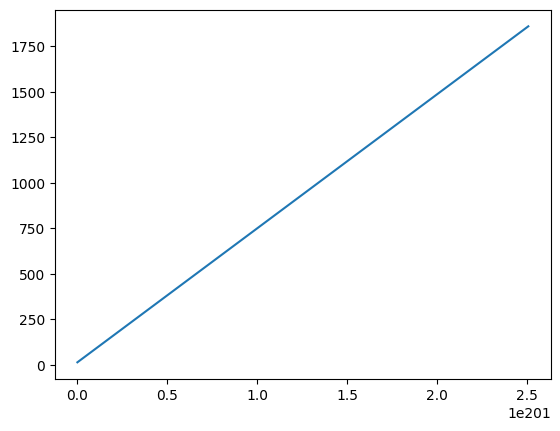

In [50]:
# Ms_dummy = np.linspace(0, 20, 100)
# k_dummy = np.exp(Ms_dummy/4)/3
# plt.plot(Ms_dummy, k_dummy)
# plt.show()
k_dummy = np.logspace(1, 1e5, 500)
Ms_dummy = 4 * np.log(3 * k_dummy)
plt.plot(k_dummy, Ms_dummy)
plt.show()

### Figure 3.9

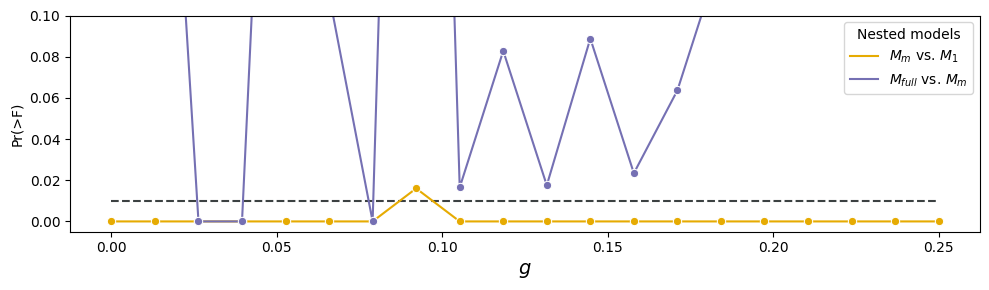

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

g_list = np.linspace(0, 0.25, 20)
solutions_path = "simulations/train"

neuron_df = pd.read_csv(f"{solutions_path}/neuron_df.csv", index_col=0)
neuron_df.loc[:, "ln Degree"] = np.log(neuron_df["Degree"])
neuron_df.loc[:, "sqrt Degree"] = np.sqrt(neuron_df["Degree"])

df = neuron_df.loc[:, ["N", "m", "Number of peaks", "Degree", "ln Degree", "sqrt Degree", "g", "Amplitude sync", "Phase sync"]]

p_value_df = pd.DataFrame(columns = ["g", "Pr(>F)", "Model"])
for g in g_list:
    df = neuron_df.loc[(neuron_df["g"] == round(g, 4)), ["m", "N", "Number of peaks", "Degree", "ln Degree", "sqrt Degree", "g", "Amplitude sync", "Phase sync"]]
    y = df["ln Degree"]
    X = sm.add_constant(df[["Number of peaks"]])
    lm_reduced = sm.OLS(y, X).fit()
    X = sm.add_constant(df[["Number of peaks", "m"]])
    lm_m = sm.OLS(y, X).fit()
    X = sm.add_constant(df[["Number of peaks", "m", "N"]])
    lm_full = sm.OLS(y, X).fit()
    anova_results = sm.stats.anova_lm(lm_reduced, lm_m, lm_full)
    anova_results["g"] = g
    anova_results["Model"] = ["$M_1$", "$M_m$ vs. $M_1$", "$M_{full}$ vs. $M_m$"]
    p_value_df = pd.concat([p_value_df, anova_results[["g", "Pr(>F)", "Model"]]])

fig, ax = plt.subplots(figsize=(10, 3))
plt.hlines(y = 0.01, xmin = g_list[0], xmax = g_list[-1], color = "xkcd:charcoal grey", linestyle = "dashed")
ax = sns.lineplot(data = p_value_df[p_value_df["Model"] != "$M_1$"], x = "g", y = "Pr(>F)", hue = "Model", marker = "o", palette = "Dark2_r")

plt.xlabel("$g$", fontsize = 14)

ax.legend(title = "Nested models")
plt.ylim(-0.005,0.1)
plt.tight_layout()
plt.savefig("Figures/3_9_evolution_of_nested_models.png", dpi = 400)
plt.show()

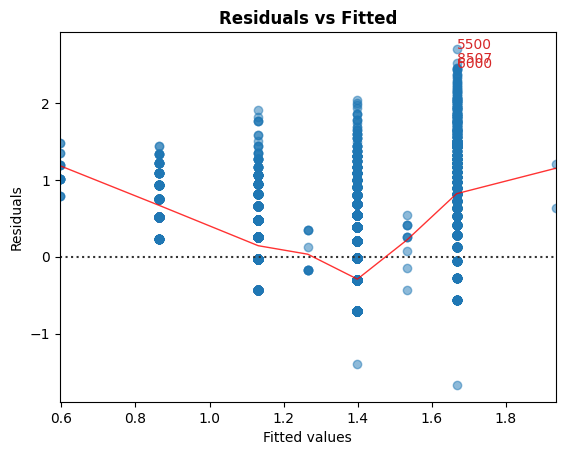

In [187]:
import LinearRegDiagnostic
cls = LinearRegDiagnostic(lm_reduced)
cls.residual_plot()
plt.show()

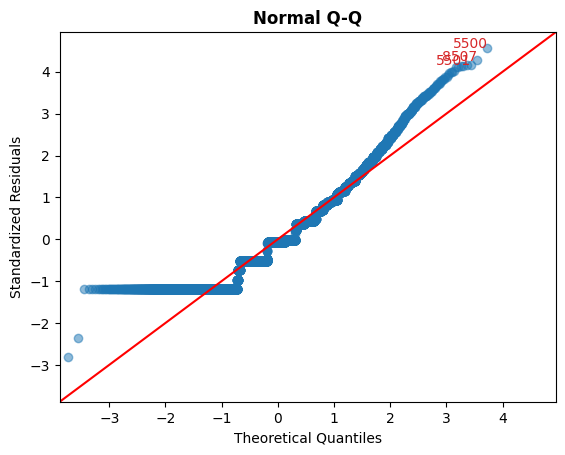

In [188]:
cls.qq_plot();

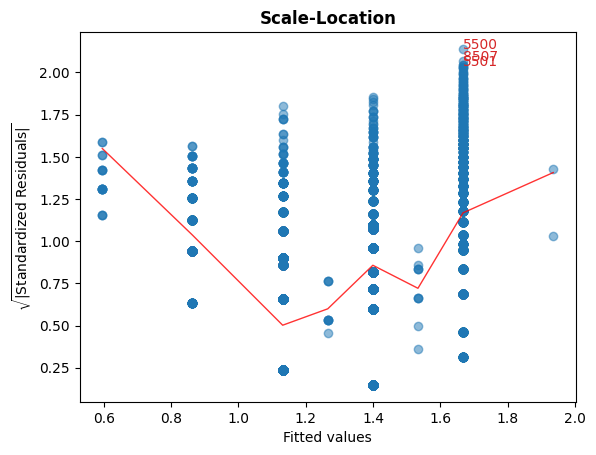

In [189]:
cls.scale_location_plot();

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

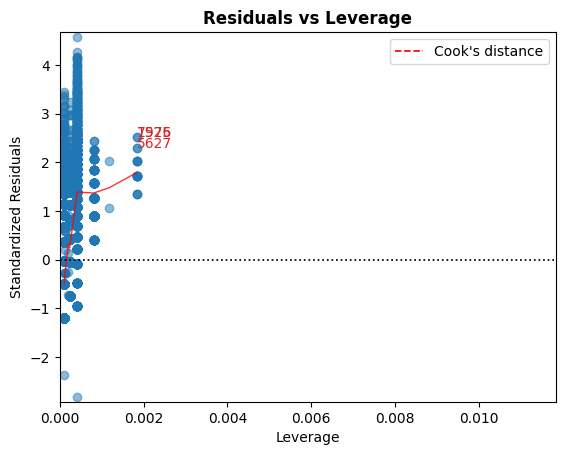

In [190]:
cls.leverage_plot()